# Titanic Dataset - Exploratory Data Analysis (EDA)

In [3]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Shranu\Downloads\train.csv")

#head() gives first 5 rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [11]:
# Statistical summary
print(df.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [13]:
#total rows and columns
print(df.shape)


(891, 12)


In [17]:
#checking Missing Values
print("--MISSING VALUES")
print(df.isnull().sum())

--MISSING VALUES
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [19]:
# Value counts for important categorical columns
print("\n--- Survived Counts ---")
print(df['Survived'].value_counts())


--- Survived Counts ---
Survived
0    549
1    342
Name: count, dtype: int64


In [21]:
print("\n--- Pclass Counts ---")
print(df['Pclass'].value_counts())


--- Pclass Counts ---
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [23]:
print("\n--- Sex Counts ---")
print(df['Sex'].value_counts())


--- Sex Counts ---
Sex
male      577
female    314
Name: count, dtype: int64


In [25]:
print("\n--- Embarked Counts ---")
print(df['Embarked'].value_counts())


--- Embarked Counts ---
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


-------Visualizations----------

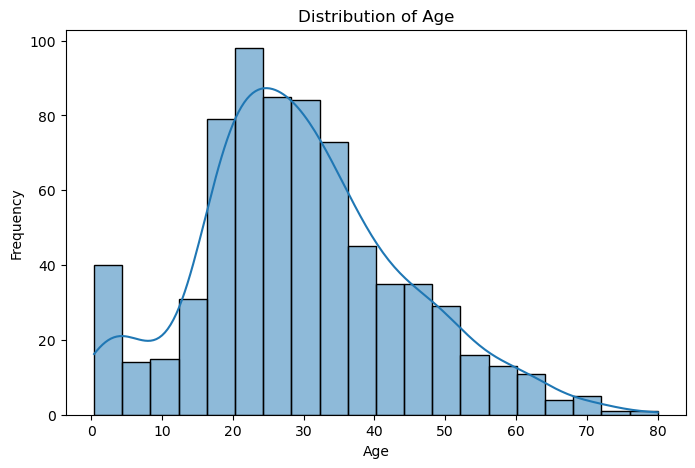

In [27]:
# 1. Distribution of Age
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# Observation: Most passengers are aged between 20-40 years.

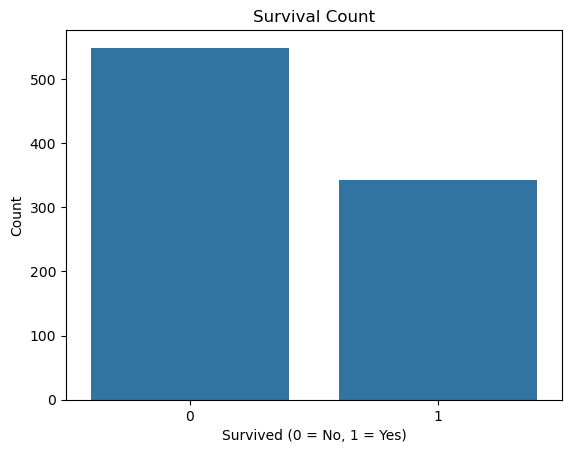

In [29]:
# 2. Survival Count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
# Observation: Majority of passengers did not survive.

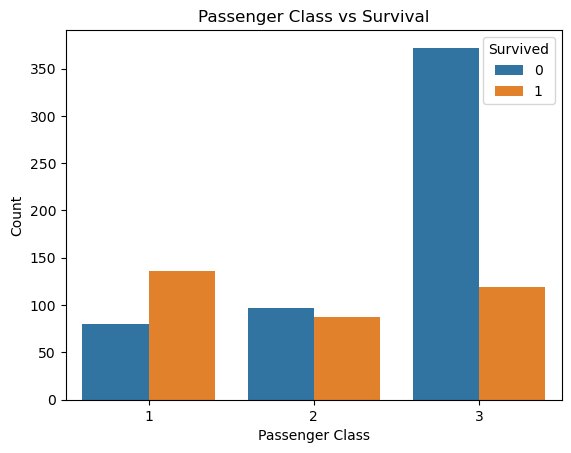

In [31]:
# 3. Passenger Class vs Survival
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Passenger Class vs Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()
# Observation: 1st class passengers had higher survival rates.

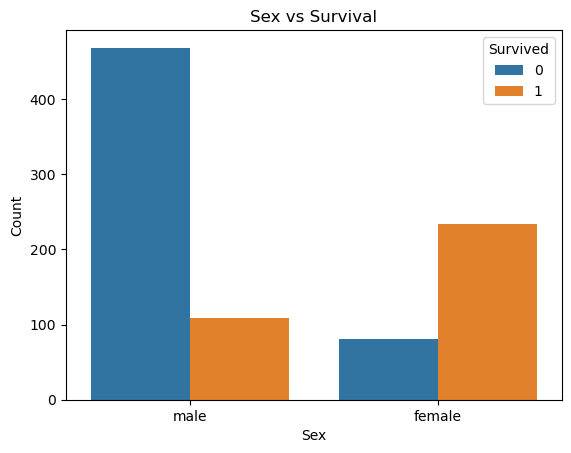

In [33]:
# 4. Sex vs Survival
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Sex vs Survival')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()
# Observation: Females had a much higher survival rate than males.

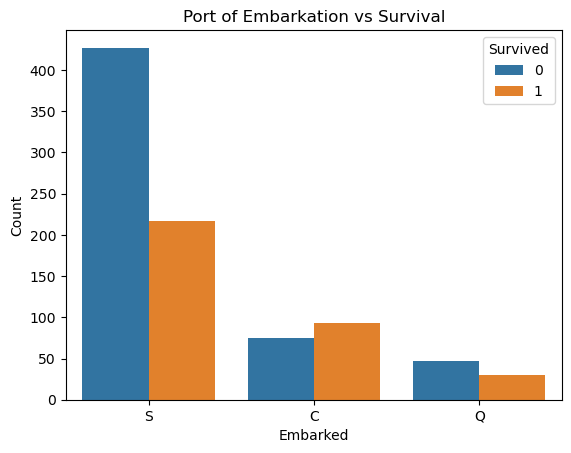

In [35]:
# 5. Embarked vs Survival
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Port of Embarkation vs Survival')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()
# Observation: Passengers from Cherbourg (C) had higher survival rates.

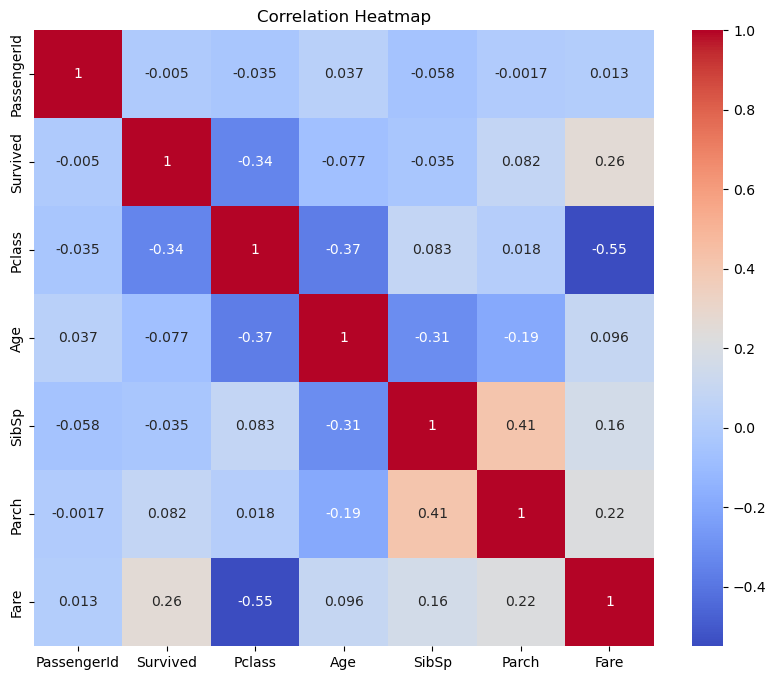

In [48]:
# 6. Heatmap of Correlations
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# Observation: Survival is moderately correlated with Fare and Pclass.

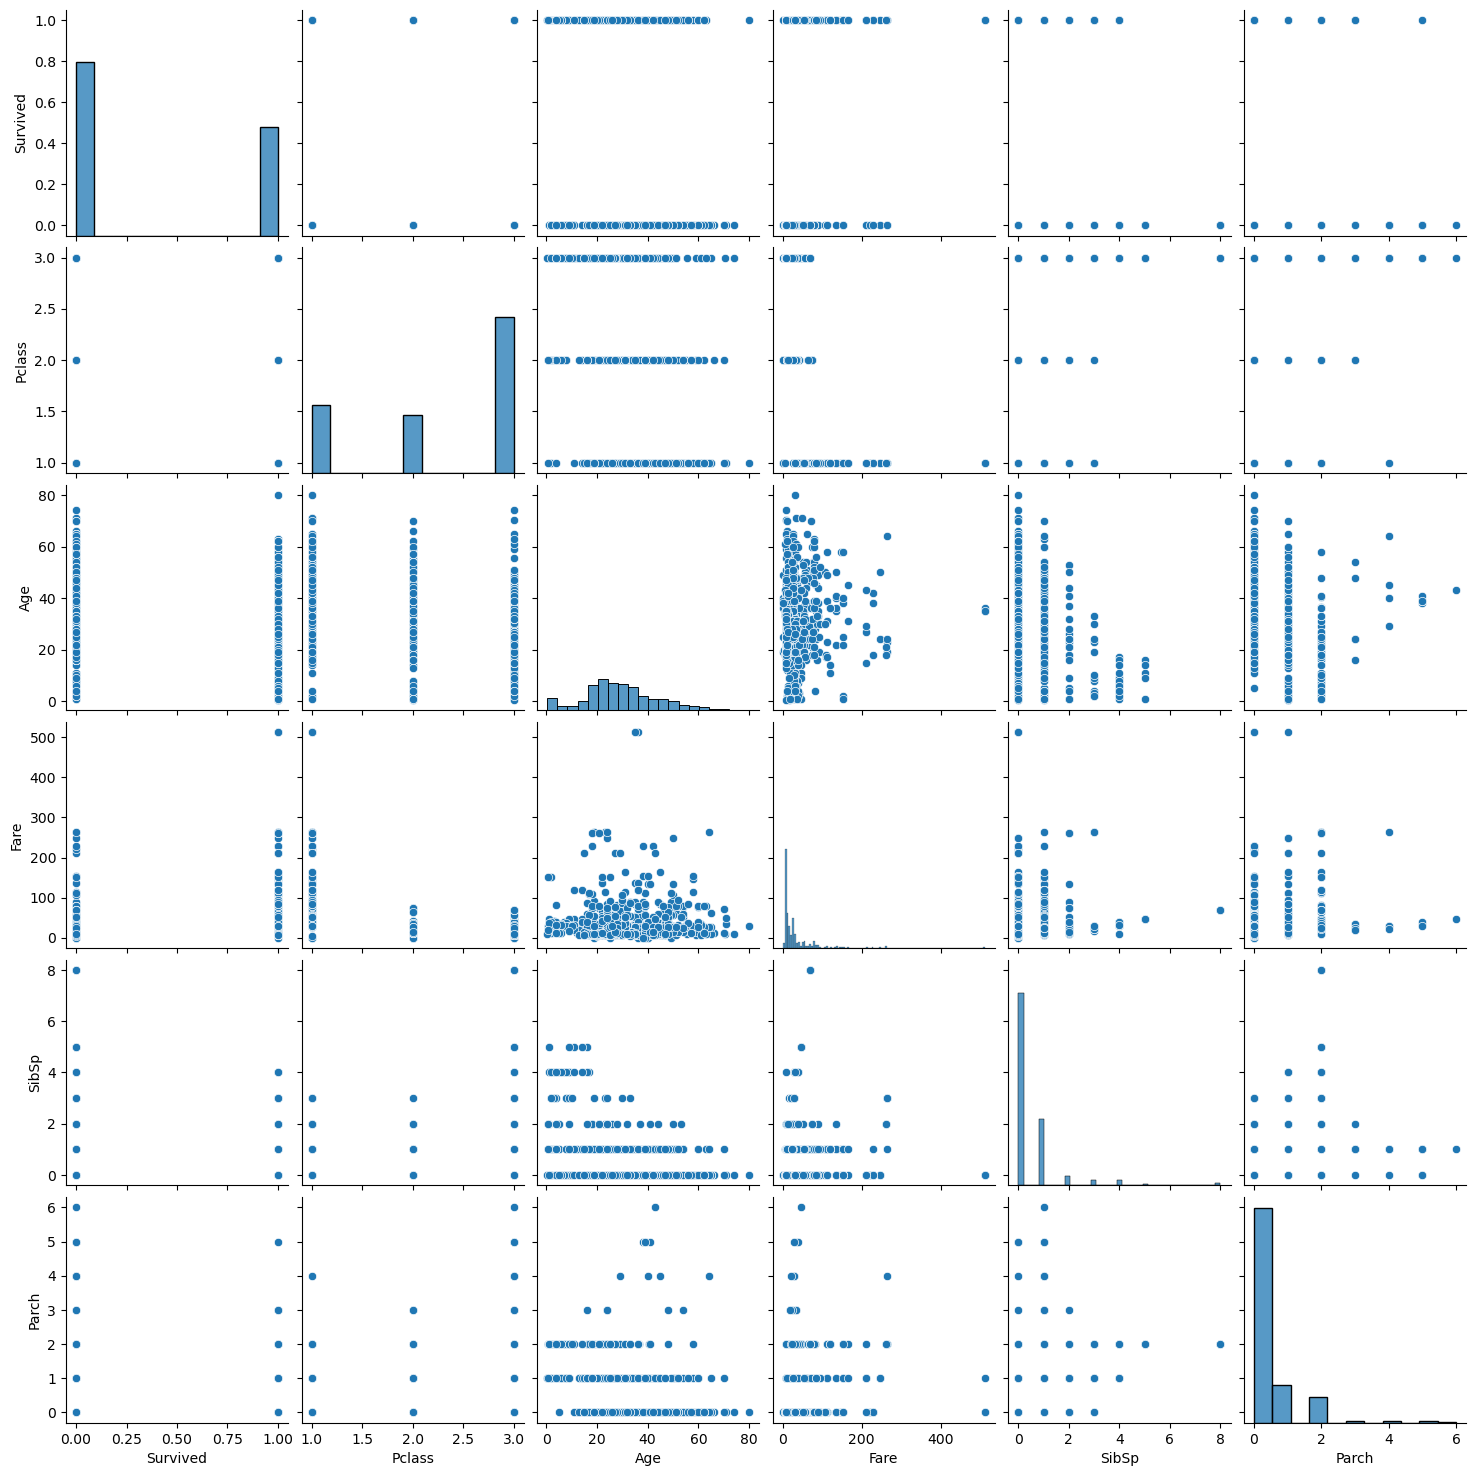

In [44]:

# 7. Pairplot
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']])
plt.show()

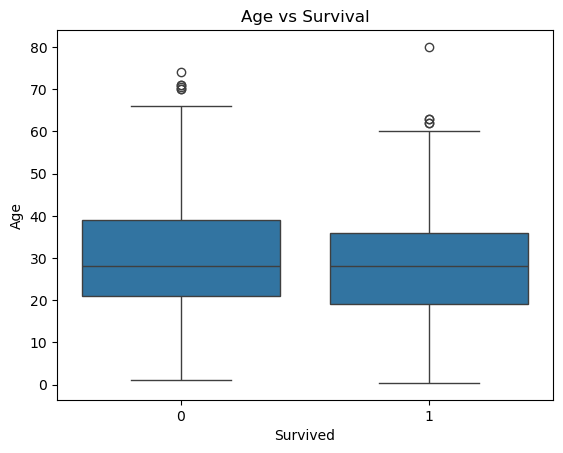

In [40]:
# 8. Boxplot: Age vs Survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()
# Observation: Younger passengers had slightly better survival chances.

# --- Summary of Findings ---
# 1. About 38% passengers survived.
# 2. Females had a much higher survival rate.
# 3. 1st class passengers had better survival chances.
# 4. Younger passengers had slightly better survival rates.
# 5. Higher fares were associated with higher survival chances.
# 6. Embarked location affected survival rates.

# End of EDA